In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
data = pd.read_csv("BTC-USD.csv")

In [3]:
btc_trace = go.Scatter(x=data['Date'], y=data['Open'], name= 'Price')
py.iplot([btc_trace])

In [4]:
sent_trace = go.Scatter(x=data['Date'], y=data['Close'], name= 'Sentiment')
py.iplot([sent_trace])

In [5]:
datag = data[['Price','Sentiment']].groupby(data['Date']).mean()

Training a  model

In [6]:
from sklearn.preprocessing import MinMaxScaler
values = datag['Price'].values.reshape(-1,1)
sentiment = datag['Sentiment'].values.reshape(-1,1)
values = values.astype('float32')
sentiment = sentiment.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [7]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))
split = train_size

2146 920


In [8]:
def create_dataset(dataset, look_back, sentiment, sent=False):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        if i >= look_back:
            a = dataset[i-look_back:i+1, 0]
            a = a.tolist()
            if(sent==True):
                a.append(sentiment[i].tolist()[0])
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
    #print(len(dataY))
    return np.array(dataX), np.array(dataY)

with lookback = 1

In [9]:
look_back = 1
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [10]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))


In [23]:
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY))

Epoch 1/300
22/22 [==============================] - 3s 28ms/step - loss: 0.1446 - val_loss: 0.1383
Epoch 2/300
22/22 [==============================] - 0s 4ms/step - loss: 0.1447 - val_loss: 0.1396
Epoch 3/300
22/22 [==============================] - 0s 3ms/step - loss: 0.1447 - val_loss: 0.1390
Epoch 4/300
22/22 [==============================] - 0s 4ms/step - loss: 0.1445 - val_loss: 0.1382
Epoch 5/300
22/22 [==============================] - 0s 4ms/step - loss: 0.1441 - val_loss: 0.1384
Epoch 6/300
22/22 [==============================] - 0s 3ms/step - loss: 0.1440 - val_loss: 0.1386
Epoch 7/300
22/22 [==============================] - 0s 4ms/step - loss: 0.1442 - val_loss: 0.1381
Epoch 8/300
22/22 [==============================] - 0s 4ms/step - loss: 0.1440 - val_loss: 0.1381
Epoch 9/300
22/22 [==============================] - 0s 4ms/step - loss: 0.1441 - val_loss: 0.1382
Epoch 10/300
22/22 [==============================] - 0s 4ms/step - loss: 0.1443 - val_loss: 0.1383
Epoch 11

29/29 [==============================] - 0s 786us/step


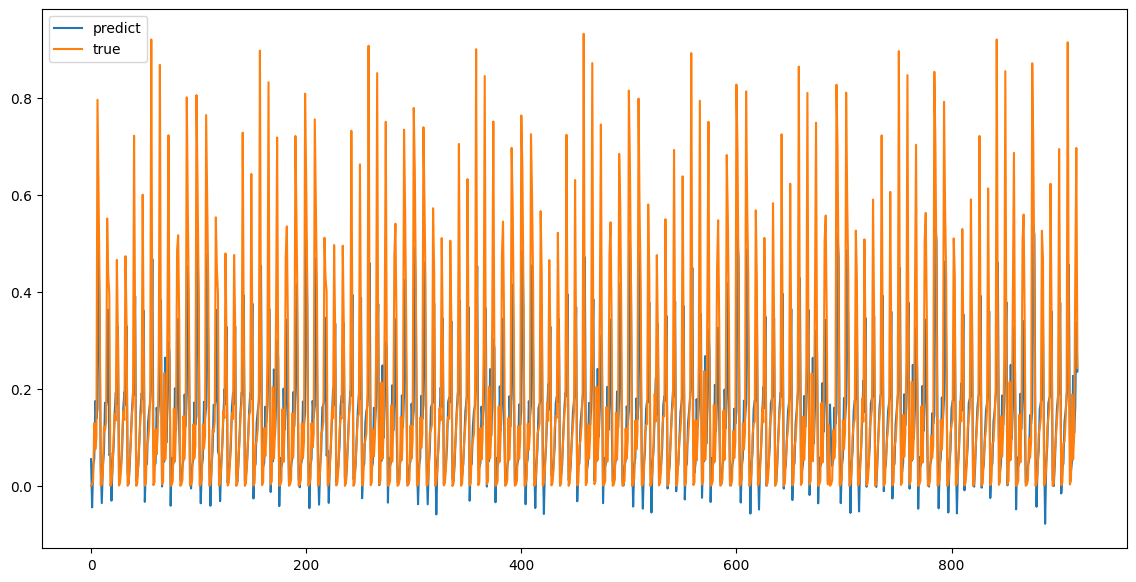

In [13]:
pyplot.figure(figsize=(14,7))
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()


In [14]:
yhat_inverse_1 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_1 = scaler.inverse_transform(testY.reshape(-1, 1))

In [15]:
rmse_1 = sqrt(mean_squared_error(testY_inverse_1, yhat_inverse_1))
print('Test RMSE: %.3f' % rmse_1)

Test RMSE: 12780.458


In [16]:
model_1 = model

with lookback = 2

In [17]:

look_back = 2
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [18]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [19]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=30, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

29/29 [==============================] - 0s 857us/step


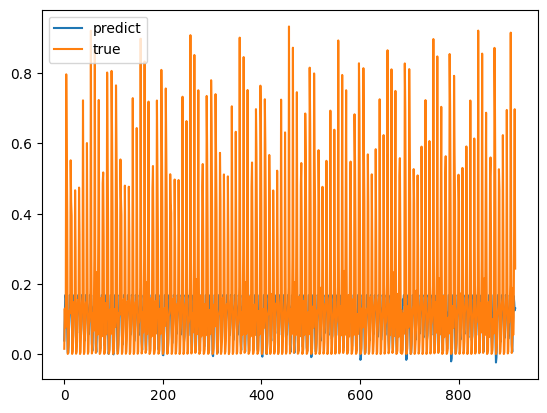

In [20]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [21]:
yhat_inverse_2 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_2 = scaler.inverse_transform(testY.reshape(-1, 1))

In [22]:
rmse_2 = sqrt(mean_squared_error(testY_inverse_2, yhat_inverse_2))
print('Test RMSE: %.3f' % rmse_2)

Test RMSE: 15621.995
